In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
#!pip install "/content/gdrive/My Drive/Colab Notebooks/TFDeepSurv/"

Processing ./gdrive/My Drive/Colab Notebooks/TFDeepSurv
  Created wheel for tfdeepsurv: filename=tfdeepsurv-2.0.0-cp36-none-any.whl size=15794 sha256=711b3c5e24f96376c4b09fbb332da9e52b8b4f39c5435b4ceaed27beb8d48b63
  Stored in directory: /tmp/pip-ephem-wheel-cache-4sv_n7v_/wheels/be/9c/9b/7f208bc17b7e2b43fd6634d51f541136728b58ff6530976b88
Successfully built tfdeepsurv
  Found existing installation: tfdeepsurv 2.0.0
    Uninstalling tfdeepsurv-2.0.0:
      Successfully uninstalled tfdeepsurv-2.0.0


# tfdeepsurv for simulated data

## Introduction

Let's use `tfdeepsurv` package to build a neural network for predicting hazard ratio. This notebook 
will show you how to build and train a neural network.

## Preparation

For all things going well, you would be better to get acquainted with **Survival Analysis**. Otherwise, I suggest you read the [reference](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html).

## Package installation

Please follow the instructions on [README](../README.md) to install `tfdeepsurv` package.

## Get it started

### Obtain datasets 

In [30]:
%tensorflow_version 1.x
from tfdeepsurv.datasets import load_simulated_data

### generate simulated data (Pandas.DataFrame)
# data configuration: 
#     hazard ratio = 2000
#     number of features = 10
#     number of valid features = 2

# No. of training data = 2000
train_data = load_simulated_data(100, N=2000, num_var=2, num_features=10, seed=1)
# No. of training data = 800
test_data = load_simulated_data(100, N=800, num_var=2, num_features=10, seed=1)

train_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,e,t
0,-0.165956,0.440649,-0.999771,-0.395335,-0.706488,-0.815323,-0.627480,-0.308879,-0.206465,0.077633,1,2.198193
1,-0.161611,0.370439,-0.591096,0.756235,-0.945225,0.340935,-0.165390,0.117380,-0.719226,-0.603797,1,0.725527
2,0.601489,0.936523,-0.373152,0.384645,0.752778,0.789213,-0.829912,-0.921890,-0.660339,0.756285,0,15.000000
3,-0.803306,-0.157785,0.915779,0.066331,0.383754,-0.368969,0.373002,0.669251,-0.963423,0.500289,0,15.000000
4,0.977722,0.496331,-0.439112,0.578559,-0.793548,-0.104213,0.817191,-0.412772,-0.424449,-0.739943,0,15.000000


### Dataset statistics

--------------- Survival Data Statistics ---------------
# Rows: 2000
# Columns: 10 + e + t
# Events Ratio: 0.84%
# Min Time: 0.0007239890401251614
# Max Time: 15.0



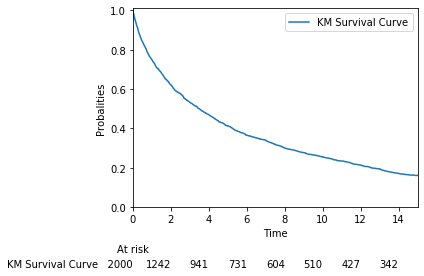

In [32]:
from tfdeepsurv.datasets import survival_stats

survival_stats(train_data, t_col="t", e_col="e", plot=True)

--------------- Survival Data Statistics ---------------
# Rows: 800
# Columns: 10 + e + t
# Events Ratio: 0.86%
# Min Time: 0.002488882513716817
# Max Time: 15.0



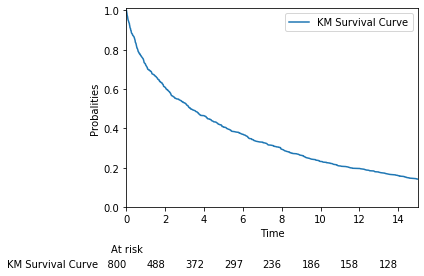

In [33]:
survival_stats(test_data, t_col="t", e_col="e", plot=True)

### Survival data transfrom

The transformed survival data contains an new label. Negtive values are considered as right censored, 
and positive values are considered as event occurrence.

**NOTE**: In version 2.0, survival data must be transformed via `tfdeepsurv.datasets.survival_df`.

In [34]:
from tfdeepsurv.datasets import survival_df

surv_train = survival_df(train_data, t_col="t", e_col="e", label_col="Y")
surv_test = survival_df(test_data, t_col="t", e_col="e", label_col="Y")

# columns 't' and 'e' are packed into an new column 'Y'
surv_train.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,Y
0,-0.165956,0.440649,-0.999771,-0.395335,-0.706488,-0.815323,-0.627480,-0.308879,-0.206465,0.077633,2.198193
1,-0.161611,0.370439,-0.591096,0.756235,-0.945225,0.340935,-0.165390,0.117380,-0.719226,-0.603797,0.725527
2,0.601489,0.936523,-0.373152,0.384645,0.752778,0.789213,-0.829912,-0.921890,-0.660339,0.756285,-15.000000
3,-0.803306,-0.157785,0.915779,0.066331,0.383754,-0.368969,0.373002,0.669251,-0.963423,0.500289,-15.000000
4,0.977722,0.496331,-0.439112,0.578559,-0.793548,-0.104213,0.817191,-0.412772,-0.424449,-0.739943,-15.000000


### Model initialization

**NOTE:** You can freely change all hyper-parameters during model initialization or training as you want.

All hyper-parameters is as follows:
- `nn_config`: model configuration
- `hidden_layers_nodes`: hidden layers configuration
- `num_steps`: training steps

Hyperparameters tuning can refer to README in directory `byopt`.

In [42]:
 
from tfdeepsurv import dsnn

input_nodes = 10
hidden_layers_nodes = [6, 3, 1]

# the arguments of dsnn can be obtained by Bayesian Hyperparameters Tuning
nn_config = {
    "learning_rate": 0.7,
    "learning_rate_decay": 1.0,
    "activation": 'relu', 
    "L1_reg": 3.4e-5, 
    "L2_reg": 8.8e-5, 
    "optimizer": 'sgd',
    "dropout_keep_prob": 1.0,
    "seed": 1
     
}
# ESSENTIAL STEP: Pass arguments
model = dsnn(
    input_nodes, 
    hidden_layers_nodes,
    nn_config
)
# ESSENTIAL STEP: Build Computation Graph
model.build_graph()

ValueError: ignored

### Model training

You can save your trained model by passing `save_model="file_name.ckpt"` or load your trained model by passing `load_model="file_name.ckpt"`

Average loss at step 100: 6.95217
Average loss at step 200: 6.95209
Average loss at step 300: 6.95119
Average loss at step 400: 6.93269
Average loss at step 500: 6.78158
Average loss at step 600: 6.67032
Average loss at step 700: 6.63302
Average loss at step 800: 6.61837
Average loss at step 900: 6.61018
Average loss at step 1000: 6.60999
Average loss at step 1100: 6.60804
Average loss at step 1200: 6.60547
Average loss at step 1300: 6.60336
Average loss at step 1400: 6.60209
Average loss at step 1500: 6.60083
Average loss at step 1600: 6.59808
Average loss at step 1700: 6.59125
Average loss at step 1800: 6.59169
Average loss at step 1900: 6.59327


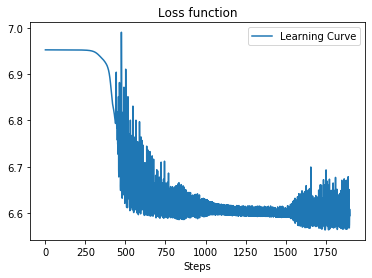

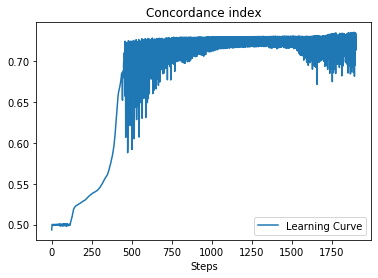

In [43]:
Y_col = ["Y"]
X_cols = [c for c in surv_train.columns if c not in Y_col]

# model saving and loading is also supported!
# read comments of `train()` function if necessary.
watch_list = model.train(
    surv_train[X_cols], surv_train[Y_col],
    num_steps=1900,
    num_skip_steps=100,
    plot=True
)

### Model evaluation

In [7]:
print("CI on training data:", model.evals(surv_train[X_cols], surv_train[Y_col]))
print("CI on test data:", model.evals(surv_test[X_cols], surv_test[Y_col]))

CI on training data: 0.8182888696228348
CI on test data: 0.8165391921195515


### Model prediction

Model prediction includes:
- predicting hazard ratio or log hazard ratio
- predicting survival function

In [8]:
# predict log hazard ratio
print(model.predict(surv_test.loc[0:4, X_cols]))
# predict hazard ratio
print(model.predict(surv_test.loc[0:4, X_cols], output_margin=False))

[[4.305882 ]
 [4.64774  ]
 [0.       ]
 [1.3145974]
 [0.       ]]
[[ 74.134575 ]
 [104.34888  ]
 [  1.       ]
 [  3.7232516]
 [  1.       ]]


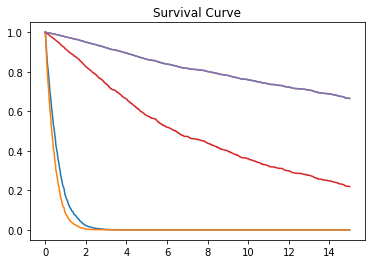

,0.000140,0.000393,0.001264,0.002716,0.002905,0.003098,0.003499,0.003662,0.004621,0.004637,0.004881,0.005402,0.005536,0.005714,0.005831,0.006005,0.006200,0.006605,0.006627,0.007151,0.007954,0.008587,0.008980,0.009840,0.009917,0.010151,0.010281,0.010307,0.010383,0.010617,0.010682,0.011667,0.011859,0.011981,0.012183,0.012206,0.012258,0.013734,0.014701,0.015915,...,13.659234,13.812429,13.853755,13.895789,13.907213,13.930838,14.069090,14.074011,14.105943,14.137335,14.152369,14.213375,14.214083,14.238584,14.283986,14.325487,14.388860,14.390475,14.396294,14.408601,14.459201,14.468274,14.471737,14.526516,14.589689,14.597026,14.665833,14.698576,14.722588,14.724381,14.737560,14.740147,14.750371,14.778524,14.781179,14.794774,14.816924,14.933478,14.945714,15.000000
0,0.999525,0.999046,0.998568,0.998088,0.997607,0.997121,0.996631,0.996139,0.995647,0.995150,0.994654,0.994156,0.993655,0.993154,0.992648,0.992140,0.991631,0.991121,0.990611,0.990099,0.989584,0.989067,0.988546,0.988024,0.987503,0.986978,0.986451,0.985923,0.985396,0.984865,0.984331,0.983796,0.983258,0.982718,0.982177,0.981635,0.981086,0.980535,0.979981,0.979427,...,1.311026e-12,1.222705e-12,1.140214e-12,1.062882e-12,9.903641e-13,9.227017e-13,8.595051e-13,8.004379e-13,7.453193e-13,6.937586e-13,6.456060e-13,6.005804e-13,5.586395e-13,5.194972e-13,4.827178e-13,4.483864e-13,4.164661e-13,3.867787e-13,3.591124e-13,3.334003e-13,3.094701e-13,2.871722e-13,2.663545e-13,2.470270e-13,2.290444e-13,2.123544e-13,1.968296e-13,1.824256e-13,1.690320e-13,1.566068e-13,1.450542e-13,1.343432e-13,1.243758e-13,1.151247e-13,1.065213e-13,9.854922e-14,9.116071e-14,8.431275e-14,7.796347e-14,7.796347e-14
1,0.999331,0.998658,0.997985,0.997310,0.996634,0.995951,0.995261,0.994570,0.993878,0.993180,0.992483,0.991784,0.991081,0.990377,0.989667,0.988955,0.988241,0.987525,0.986809,0.986092,0.985370,0.984645,0.983916,0.983185,0.982454,0.981719,0.980982,0.980243,0.979505,0.978762,0.978015,0.977267,0.976515,0.975760,0.975005,0.974248,0.973480,0.972710,0.971937,0.971165,...,1.882879e-17,1.706821e-17,1.546996e-17,1.401384e-17,1.268699e-17,1.148416e-17,1.039270e-17,9.401680e-18,8.503385e-18,7.687212e-18,6.946971e-18,6.274848e-18,5.666961e-18,5.116157e-18,4.613780e-18,4.158699e-18,3.748117e-18,3.377586e-18,3.042549e-18,2.740460e-18,2.467702e-18,2.221163e-18,1.997919e-18,1.796920e-18,1.615571e-18,1.452365e-18,1.305171e-18,1.172766e-18,1.053410e-18,9.460736e-19,8.493391e-19,7.624105e-19,6.840122e-19,6.135019e-19,5.499662e-19,4.929285e-19,4.417172e-19,3.957380e-19,3.544441e-19,3.544441e-19
2,0.999994,0.999987,0.999981,0.999974,0.999968,0.999961,0.999954,0.999948,0.999941,0.999934,0.999928,0.999921,0.999914,0.999907,0.999900,0.999894,0.999887,0.999880,0.999873,0.999866,0.999859,0.999852,0.999845,0.999837,0.999830,0.999823,0.999816,0.999809,0.999802,0.999794,0.999787,0.999780,0.999772,0.999765,0.999757,0.999750,0.999742,0.999735,0.999727,0.999720,...,6.913829e-01,6.907328e-01,6.900823e-01,6.894289e-01,6.887720e-01,6.881148e-01,6.874566e-01,6.867967e-01,6.861360e-01,6.854729e-01,6.848081e-01,6.841406e-01,6.834729e-01,6.828035e-01,6.821275e-01,6.814490e-01,6.807705e-01,6.800917e-01,6.794112e-01,6.787307e-01,6.780491e-01,6.773655e-01,6.766783e-01,6.759911e-01,6.753022e-01,6.746134e-01,6.739229e-01,6.732324e-01,6.725403e-01,6.718480e-01,6.711539e-01,6.704598e-01,6.697629e-01,6.690650e-01,6.683644e-01,6.676635e-01,6.669620e-01,6.662598e-01,6.655565e-01,6.655565e-01
3,0.999976,0.999952,0.999928,0.999904,0.999880,0.999855,0.999831,0.999806,0.999781,0.999756,0.999731,0.999706,0.999680,0.999655,0.999629,0.999604,0.999578,0.999552,0.999526,0.999500,0.999474,0.999448,0.999422,0.999395,0.999369,0.999342,0.999315,0.999288,0.999261,0.999234,0.999207,0.999180,0.999152,0.999125,0.999097,0.999070,0.999041,0.999013,0.998985,0.998957,...,2.530651e-01,2.521802e-01,2.512971e-01,2.504123e-01,2.495251e-01,2.486399e-01,2.477555e-01,2.468711e-01,2.459881e-01,2.451041e-01,2.442202e-01,2.433351e-01,2.424520e-01,2.415690e-01,2.406798e-01,2.397897e-01,2.3

In [9]:
# predict survival function
model.predict_survival_function(surv_test.loc[0:4, X_cols], plot=True)

In [0]:
import pandas as pd
import numpy as np

# Inspecting importance



In [100]:
test_col = 'x_1'
tests = 100
vmax = max(surv_test.loc[:,test_col])
vmin = min(surv_test.loc[:,test_col])
print(vmax)
print(vmin)
pr = surv_test.loc[0:0, X_cols]
pr=pr.append([pr]*tests)
pr[test_col][1:pr.shape[0]] = np.linspace(vmin,vmax,pr.shape[0]-1)
print(pr)
print(pr.shape)


0.9922828674316406
-0.9984269142150879
         x_0       x_1       x_2  ...       x_7       x_8       x_9
0  -0.165956  0.440649 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956 -0.998427 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956 -0.978319 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956 -0.958211 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956 -0.938102 -0.999771  ... -0.308879 -0.206465  0.077633
..       ...       ...       ...  ...       ...       ...       ...
0  -0.165956  0.911850 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956  0.931958 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956  0.952066 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956  0.972175 -0.999771  ... -0.308879 -0.206465  0.077633
0  -0.165956  0.992283 -0.999771  ... -0.308879 -0.206465  0.077633

[101 rows x 10 columns]
(101, 10)


In [101]:
#print(model.predict(pr))
out= model.predict(pr, output_margin=False)
print(np.c_[pr[test_col],out])
#model.predict_survival_function(pr, plot=True)

[[ 4.40648973e-01  7.78917074e+00]
 [-9.98426914e-01  1.00000000e+00]
 [-9.78318751e-01  1.00000000e+00]
 [-9.58210528e-01  1.00000000e+00]
 [-9.38102365e-01  1.00000000e+00]
 [-9.17994201e-01  1.00000000e+00]
 [-8.97886038e-01  1.00000000e+00]
 [-8.77777815e-01  1.00000000e+00]
 [-8.57669652e-01  1.00000000e+00]
 [-8.37561488e-01  1.00000000e+00]
 [-8.17453325e-01  1.00000000e+00]
 [-7.97345102e-01  1.00000000e+00]
 [-7.77236938e-01  1.00000000e+00]
 [-7.57128775e-01  1.00000000e+00]
 [-7.37020552e-01  1.00000000e+00]
 [-7.16912389e-01  1.00000000e+00]
 [-6.96804225e-01  1.00000000e+00]
 [-6.76696062e-01  1.00000000e+00]
 [-6.56587839e-01  1.00000000e+00]
 [-6.36479676e-01  1.00000000e+00]
 [-6.16371512e-01  1.00000000e+00]
 [-5.96263349e-01  1.04771602e+00]
 [-5.76155126e-01  1.18306088e+00]
 [-5.56046963e-01  1.33588886e+00]
 [-5.35938799e-01  1.50845981e+00]
 [-5.15830576e-01  1.70332444e+00]
 [-4.95722413e-01  1.92336023e+00]
 [-4.75614250e-01  2.17182040e+00]
 [-4.55506057e-01  2

### tf.session close

To release resources, we use `model.close_session()` to close session in tensorflow!

In [12]:
model.close_session()

Current session closed.
